In [1]:
import seaborn as sns
import pandas as pd
import configparser
import matplotlib.pyplot as plt
import ast
import numpy as np
import matplotlib.colors as mcolors

In [24]:
df = pd.read_csv('../results/CATE final.csv')
df['T'] = df['T1'] + df['T2']
df = df[df['T']<50]
df['T'].describe()

count    273.000000
mean       4.670330
std        1.900396
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       11.000000
Name: T, dtype: float64

In [8]:
df['T_bound'] = df['Theorem 3.1'].str.extract(r'1\.\s*\d+\s*<=\s*(\d+\.?\d*)')
df['T_bound'] = df['T_bound'].astype(float)
df['T_bound'].describe()

count       273.000000
mean      31622.710623
std       10595.181201
min       20000.000000
25%       26000.000000
50%       30000.000000
75%       34000.000000
max      148000.000000
Name: T_bound, dtype: float64

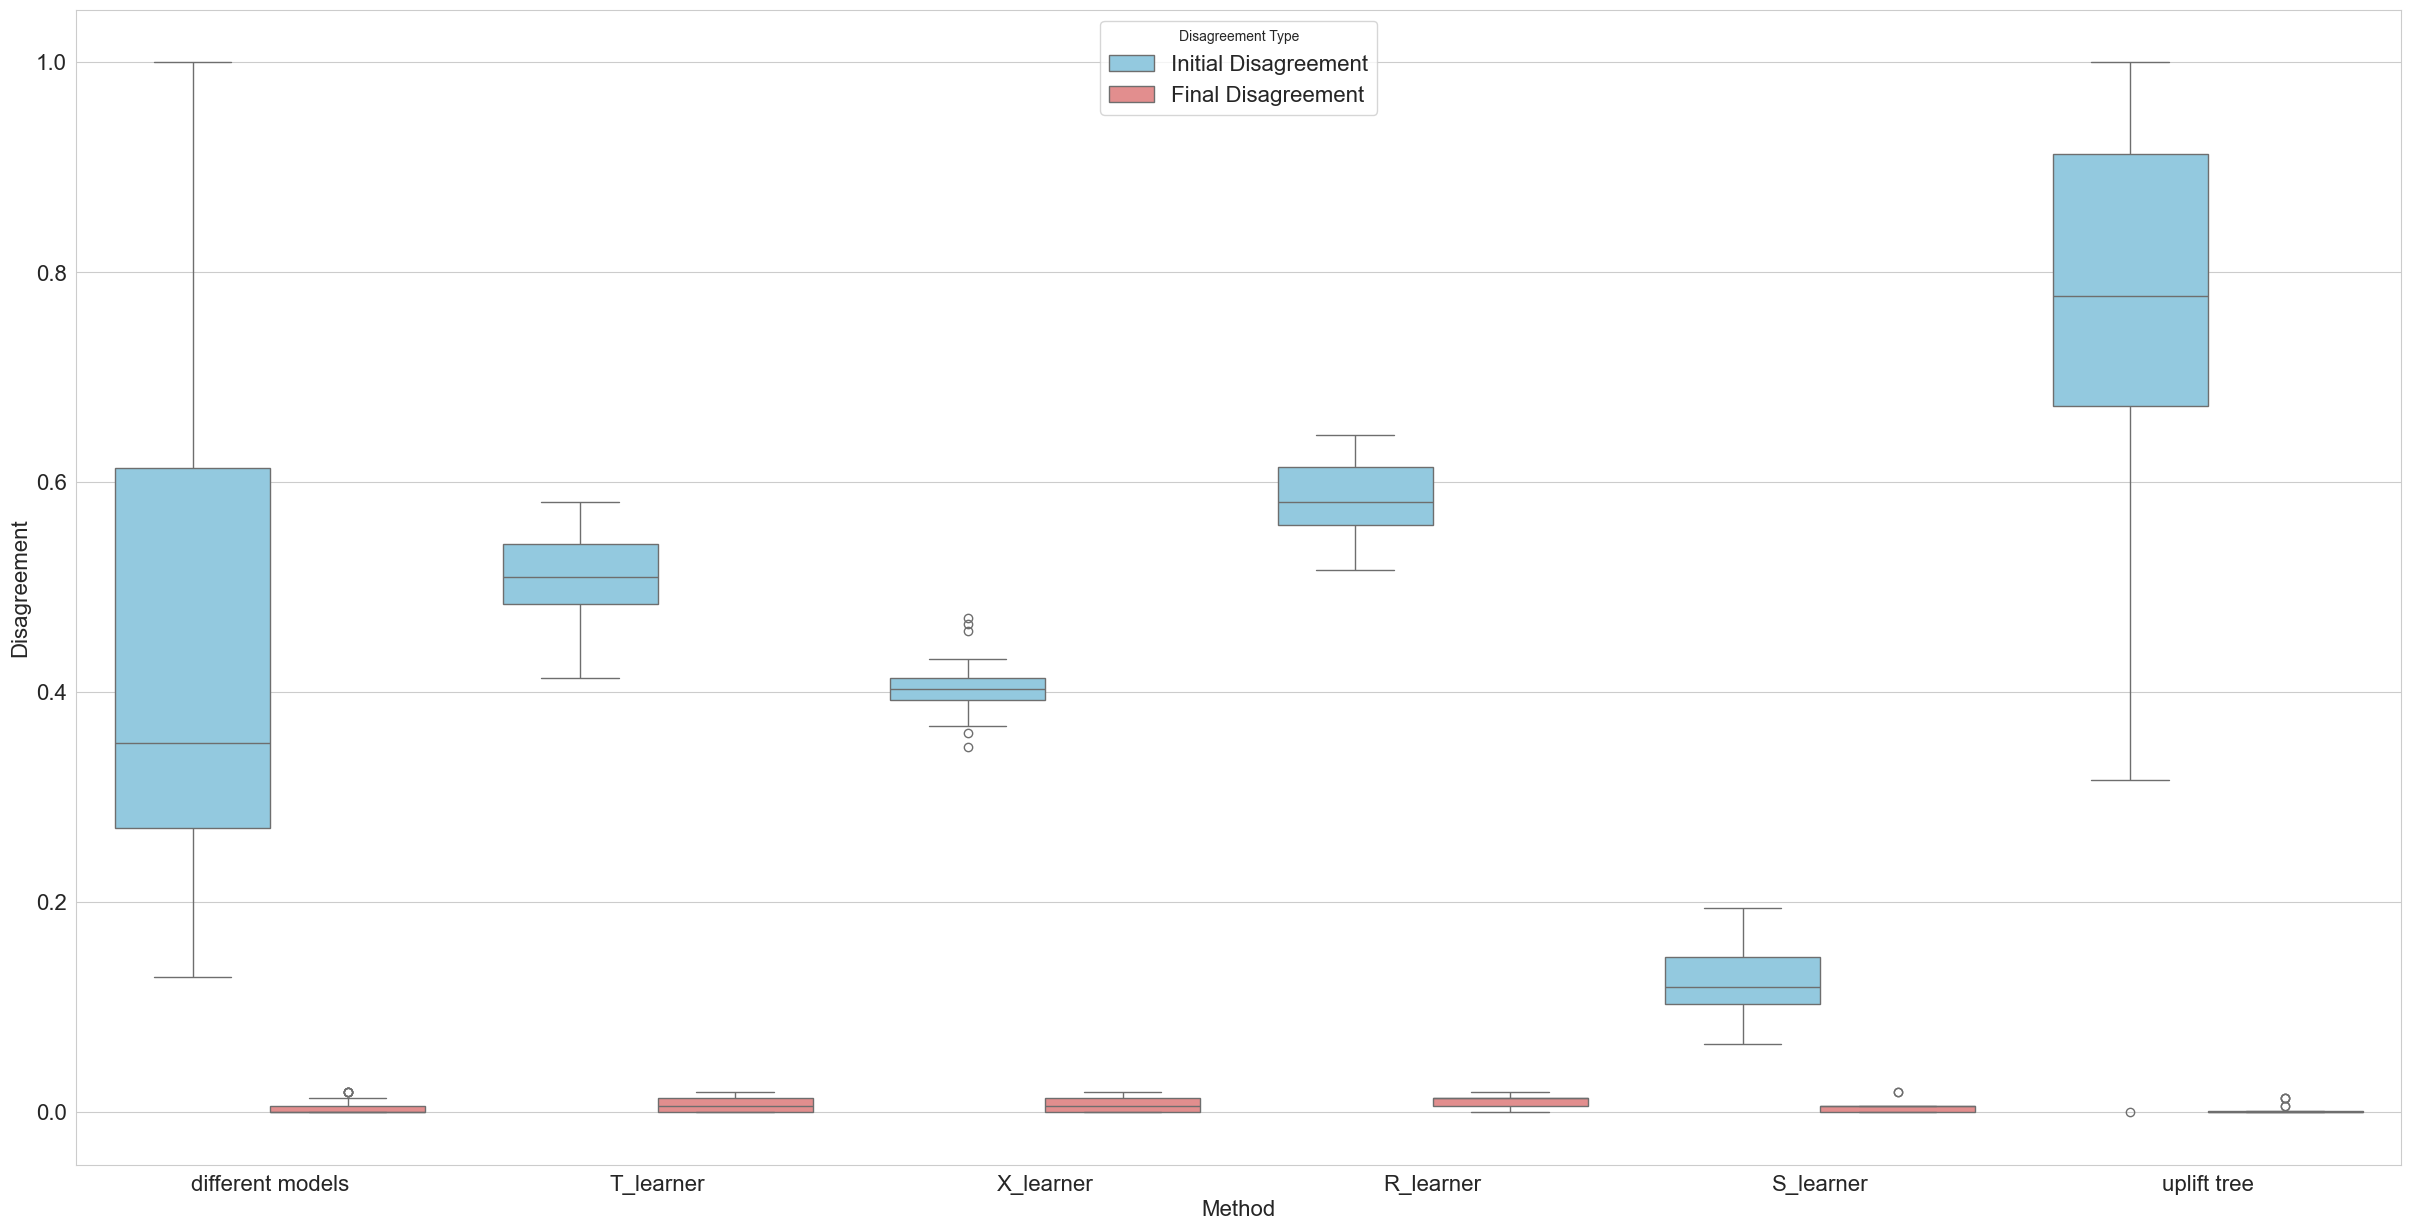

<Figure size 640x480 with 0 Axes>

In [22]:

fig, ax = plt.subplots(1, figsize=(30, 15), sharey=True)  # 2x4 grid (even though we only need 7)
# ax = axes[0]
df.loc[df['Method'] == 'Different_Models', 'Models'] = 'different models'
initial_color = 'skyblue'
final_color = 'lightcoral'

# df_subset = df[df['Method'] == 'Different_Data']
df_melted = pd.melt(df, id_vars=['Models'], 
                    value_vars=['Initial Disagreement', 'Final Disagreement'], 
                    var_name='Disagreement Type', value_name='Disagreement')

sns.boxplot(x='Models', y='Disagreement', hue='Disagreement Type', data=df_melted, 
            ax=ax, palette={'Initial Disagreement': initial_color, 'Final Disagreement': final_color})

# Set the title for each subplot
# ax.set_title('Disagreement', fontsize=16)
# ax.get_legend().remove()
# Set labels for each subplot
ax.set_xlabel('Method', fontsize=16)
ax.set_ylabel('Disagreement', fontsize=16)

handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=2, title='Disagreement', bbox_to_anchor=(0.5, 1.05), fontsize=16)

plt.rcParams['axes.labelsize'] = 16  # Axis labels
plt.rcParams['xtick.labelsize'] = 16  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 16  # Y-axis tick labels
plt.rcParams['legend.fontsize'] = 16  # Legend font size
plt.rcParams['axes.titlesize'] = 16 
# Show the plot
plt.show()
plt.tight_layout()

# Show the plot
plt.show()

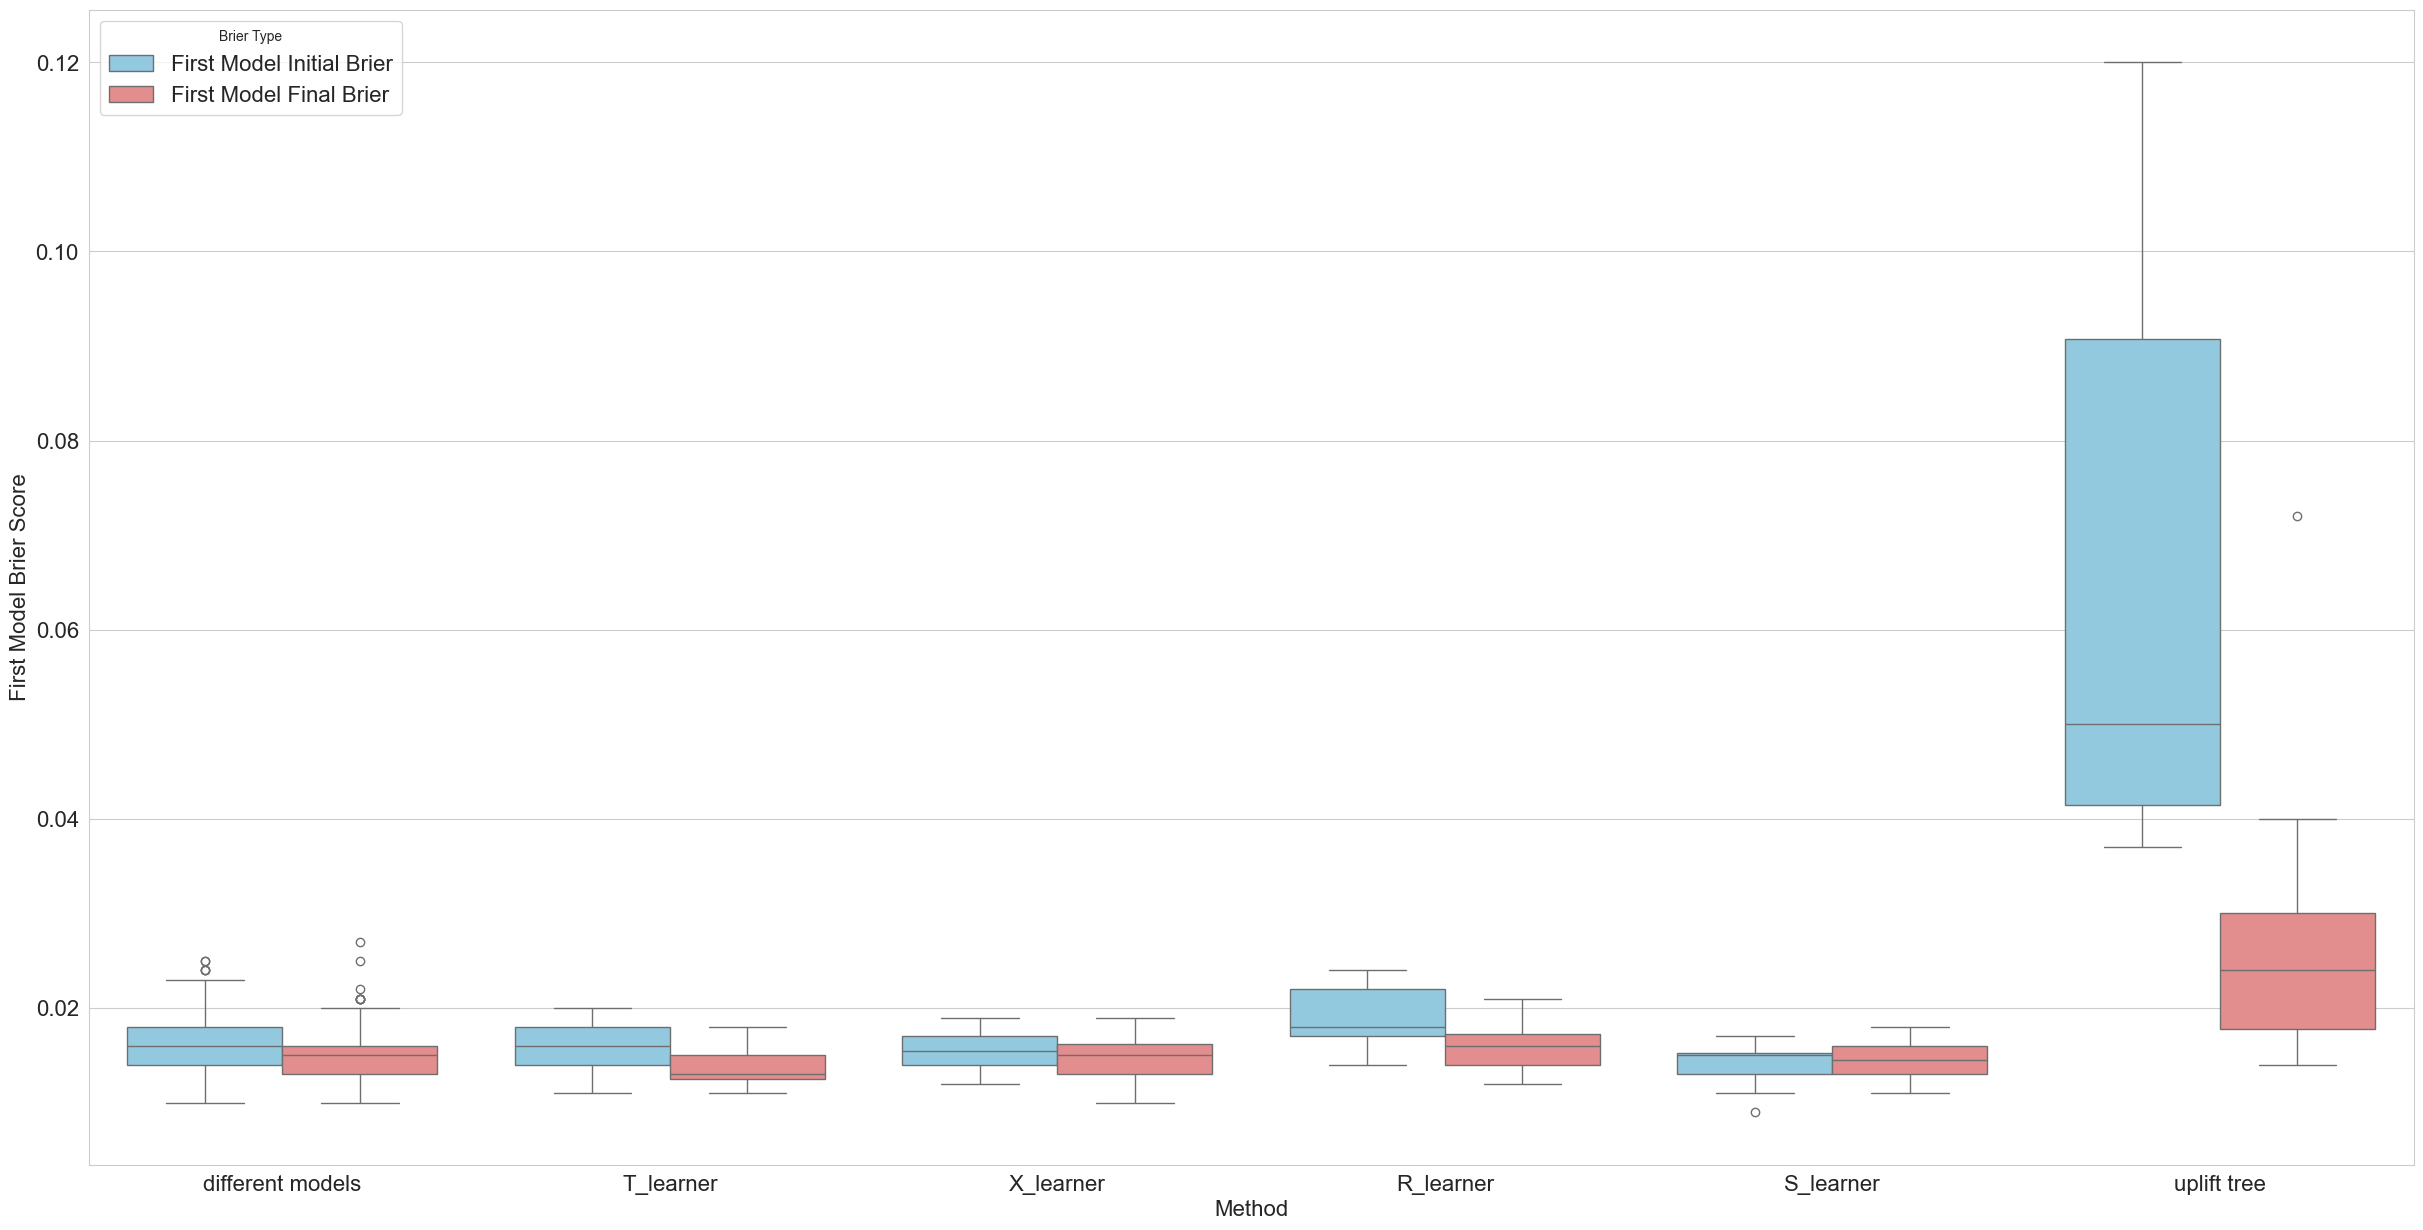

<Figure size 640x480 with 0 Axes>

In [23]:
df['First Model Initial Brier'] = df['Initial Brier'].apply(lambda x: ast.literal_eval(x)[0])
df['First Model Final Brier'] = df['Final Brier'].apply(lambda x: ast.literal_eval(x)[0])
fig, ax = plt.subplots(1, figsize=(30, 15), sharey=True)  # 2x4 grid (even though we only need 7)
# ax = axes[0]
# df.loc[df['Method'] == 'Different_Models', 'Models'] = 'different models'
initial_color = 'skyblue'
final_color = 'lightcoral'

# df_subset = df[df['Method'] == 'Different_Data']
df_melted = pd.melt(df, id_vars=['Models'], 
                   value_vars=['First Model Initial Brier', 'First Model Final Brier'], 
                        var_name='Brier Type', value_name='Brier Score')

sns.boxplot(x='Models', y='Brier Score', hue='Brier Type', data=df_melted, 
                ax=ax, palette={'First Model Initial Brier': initial_color, 'First Model Final Brier': final_color})

# Set the title for each subplot
# ax.set_title('', fontsize=16)

# Set labels for each subplot
ax.set_xlabel('Method', fontsize=16)
ax.set_ylabel('First Model Brier Score', fontsize=16)
# ax.get_legend().remove()


handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=2, title='Disagreement', bbox_to_anchor=(0.5, 1.05), fontsize=16)

plt.rcParams['axes.labelsize'] = 16  # Axis labels
plt.rcParams['xtick.labelsize'] = 16  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 16  # Y-axis tick labels
plt.rcParams['legend.fontsize'] = 16  # Legend font size
plt.rcParams['axes.titlesize'] = 16 
# Show the plot
plt.show()
plt.tight_layout()

# Show the plot
plt.show()